# Introduction

In this notebook, we provide a simple example of how to use calibration for binary
classifiers. 

In some cases, you do not (only) want to classify instances but you
are also interested in the probabilty of the classification. This allows 
to work at a more detailed level by saying that, for example, a customer belongs to
class 1 with a probability of 60%. Some models like SVM are known to give poor estimates 
of the class probabilities and calibration is a way to improve this. 

Probability calibration is supported by scikit-learn and Probatus provide an handy
wrapper function. For more information, please look at the following link:

Scikit-learn: https://scikit-learn.org/stable/modules/calibration.html

In-depth: https://www.cs.cornell.edu/~alexn/papers/calibration.icml05.crc.rev3.pdf

In [30]:
from probatus.calibration import Calibrator
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%run '../probatus/calibration/calibrator.py'

Create a dummy data set for the example

In [9]:
# Creating a dummy dataset
np.random.seed(42)
X, y = make_classification(n_samples=10000, n_features=10, n_informative=2, n_redundant=0, weights=[0.75,0.25])
X = pd.DataFrame(X)
y = pd.DataFrame(y)

n_train_samples = 9000

X_train, y_train = X[:n_train_samples], y[:n_train_samples]
X_test, y_test = X[n_train_samples:], y[n_train_samples:]

In [10]:
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9
0,-1.210553,0.489124,-0.170607,0.678116,0.317374,0.223679,-2.648368,1.252575,0.788824,-0.043899
1,0.276602,-0.590667,0.662015,0.049810,-0.360608,-1.122170,-1.935954,0.094508,-0.743336,-1.466553
2,-0.432222,-0.422658,0.957586,-0.779766,0.509617,0.072764,-1.802808,1.509765,0.345242,1.656180


In [11]:
y_train.head(3)

,0
0,0
1,0
2,0


## Build models based on the data

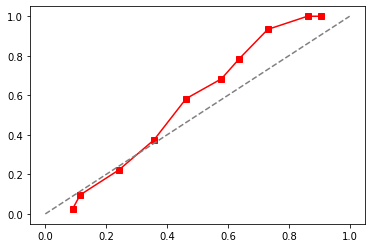

In [12]:
# Fitting a random forest on the data and producing a calibration plot
clf_rf = RandomForestClassifier(max_depth=4)
clf_rf.fit(X_train, y_train)
y_test_predict_proba = clf_rf.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Uncalibrated')
plt.plot([0, 1], [0, 1], '--', color='gray')

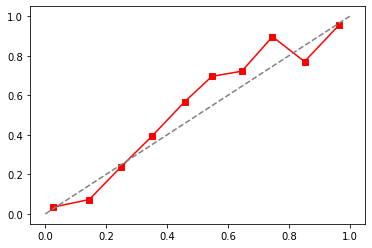

In [13]:
# Fitting a logistic regression on the data and producing a calibration plot
clf_lg = LogisticRegression()
clf_lg.fit(X_train, y_train)
y_test_predict_proba = clf_lg.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Uncalibrated')
plt.plot([0, 1], [0, 1], '--', color='gray')

# Calibrate Random Forest

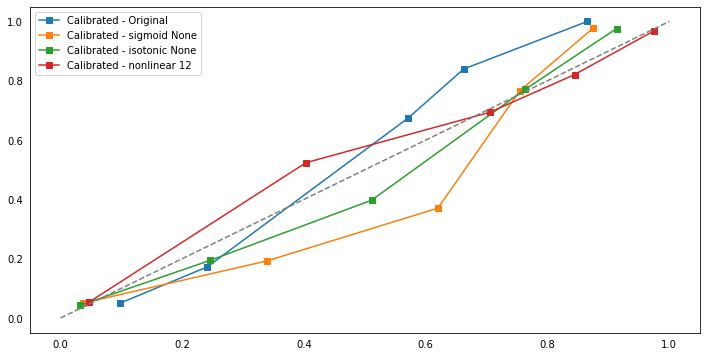

In [31]:
# Lets run the calibration for random forest
my_calibrator_rf = Calibrator({'sigmoid':None,'isotonic':None,'nonlinear':12}, 3, 'agglomerative', 5)

# Fitting the calibrator on the data and the model
my_calibrator_rf.fit(clf_rf,X_train,X_test,y_test,y_train)

# Plotting the calibrated RF
my_calibrator_rf.plot()

The calibrated score can be easily extracted using the score module

In [32]:
# Extracting the calibrated probabilities
pd.DataFrame(my_calibrator_rf.score('isotonic',X_test,clf_rf)[:,1]).head(12)

,0
0,0.791508
1,0.147130
2,0.457214
3,0.054751
4,0.817277
5,0.975222
6,0.604608
7,0.020422
8,0.318292
9,0.038319


In [33]:
# Extracting the dictionary with all calibrators
my_calibrator_rf.get_calibs()

{'sigmoid': CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                              class_weight=None,
                                                              criterion='gini',
                                                              max_depth=4,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                                              n_estimators=1

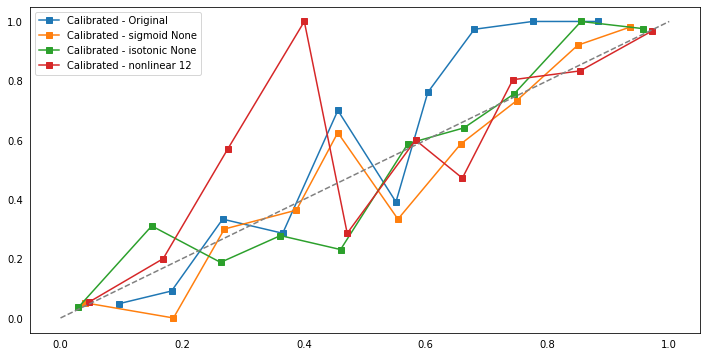

In [34]:
# Lets run the calibration for random forest
my_calibrator_rf = Calibrator({'sigmoid':None,'isotonic':None,'nonlinear':12}, 3, 'simple', 10)

# Fitting the calibrator on the data and the model
my_calibrator_rf.fit(clf_rf,X_train,X_test,y_test,y_train)

# Plotting the calibrated RF
my_calibrator_rf.plot()

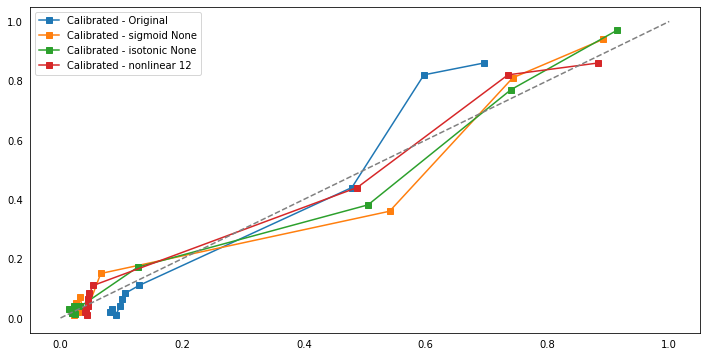

In [35]:
# Lets run the calibration for random forest
my_calibrator_rf = Calibrator({'sigmoid':None,'isotonic':None,'nonlinear':12}, 3, 'quantile', 10)

# Fitting the calibrator on the data and the model
my_calibrator_rf.fit(clf_rf,X_train,X_test,y_test,y_train)

# Plotting the calibrated RF
my_calibrator_rf.plot()